# Loading Libraries and Dataset

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


# Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

#### Size of Rows and Columns of the dataset

In [8]:
print(f"Rows = {df.shape[0]} and Columns {df.shape[1]}")

Rows = 74 and Columns 20


#### How many cloumns have null values in total.

In [10]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Basic Questions

### 1. Which team won the most matches ?

Text(0.5, 1.0, 'Most match win by team ')

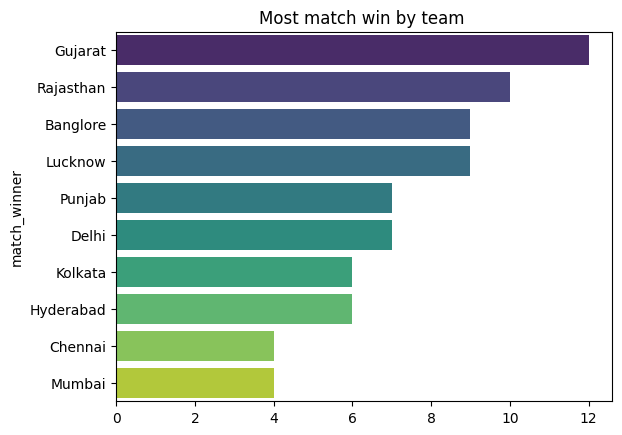

In [15]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y = match_wins.index, x = match_wins.values,palette='viridis')
plt.title("Most match win by team ")

### 2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decisions Trends')

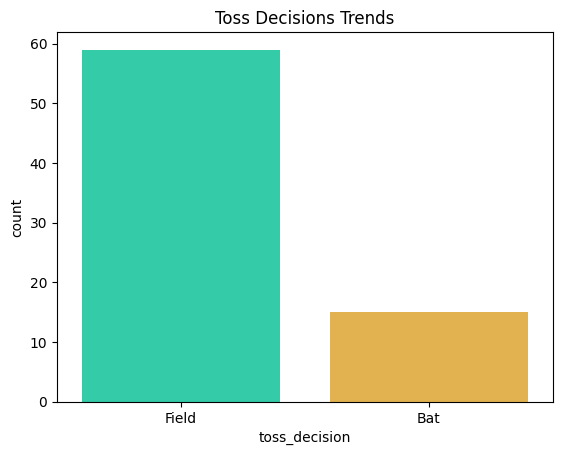

In [19]:
sns.countplot(x = df['toss_decision'],palette='turbo')
plt.title("Toss Decisions Trends")

### 3. Toss Winner vs Match Winner

In [30]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2).item()

48.65

### 4. Teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

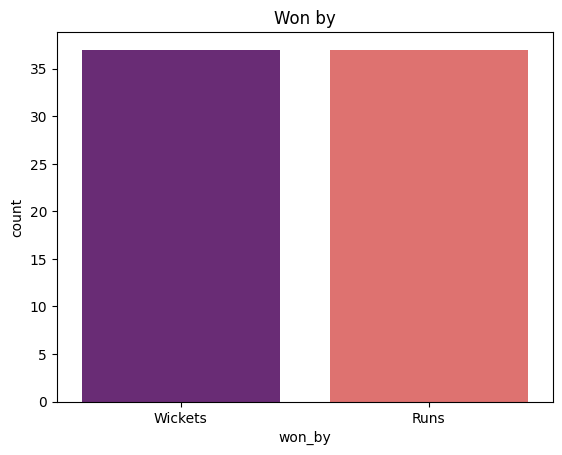

In [32]:
sns.countplot(x = df['won_by'],palette='magma')
plt.title("Won by")

## Key Player Performance

### 1 Most "Player of the match" Awards

In [33]:
count = df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Players with Man of the match')

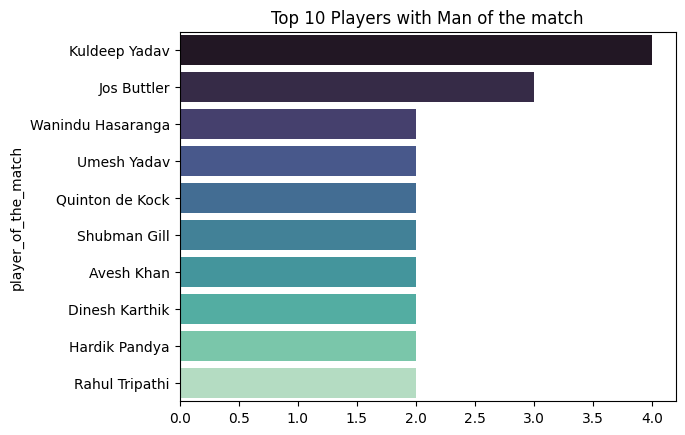

In [35]:
sns.barplot(x = count.values , y = count.index , palette='mako')
plt.title("Top 10 Players with Man of the match")

### 2 Top Scorers

In [38]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0.5, 1.0, 'Top 2 Scorers')

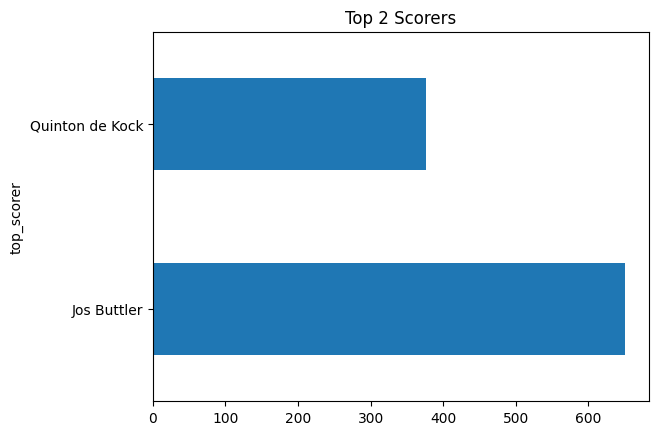

In [40]:
high.plot(kind = 'barh')
plt.title('Top 2 Scorers')

### 10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

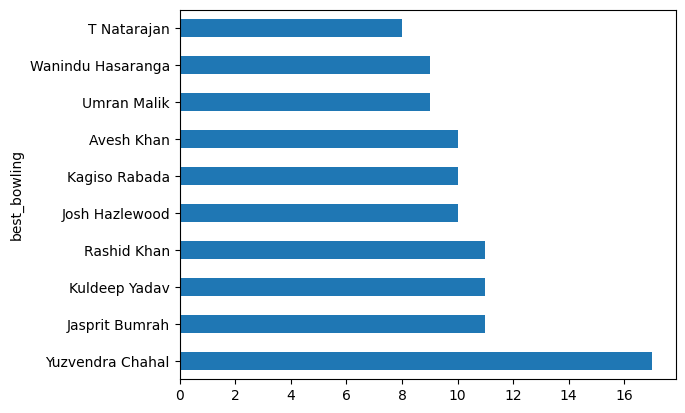

In [46]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind = 'barh')

## Venue Analysis

### Most Matches Played by Venue

In [47]:
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

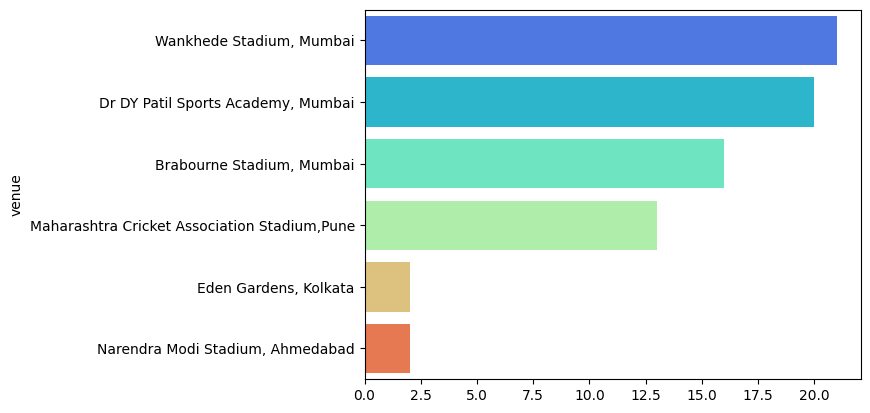

In [48]:
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

##### Who won the highest margin by runs?

In [49]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


##### Which player had the highest individual score?

In [50]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


##### Which bowler had the best bowling figures?

In [51]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
